# Building NARX models using general estimators

Example created by Wilson Rocha Lacerda Junior

In this example we will create NARX models using different estimator like GrandientBoostingRegressior, Bayesian Regression, Automatic Relevance Determination (ARD) Regression and Catboost

In [2]:
import matplotlib.pyplot as plt
from sysidentpy.metrics import mean_squared_error
from sysidentpy.utils.generate_data import get_siso_data
from sysidentpy.general_estimators import NARX
from sklearn.linear_model import BayesianRidge, ARDRegression
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

In [3]:
# simulated dataset
x_train, x_valid, y_train, y_valid = get_siso_data(n=10000,
                                                   colored_noise=False,
                                                   sigma=0.01,
                                                   train_percentage=80)

To see the importance of the NARX architecture, lets take a look in the performance of the models without the NARX configuration.

In [12]:
catboost = CatBoostRegressor(iterations=300,
                             learning_rate=0.1,
                             depth=6)

In [13]:
gb = GradientBoostingRegressor(loss='quantile', alpha=0.90,
                                n_estimators=250, max_depth=10,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9)

In [22]:
def plot_results(yvalid, yhat):
    _, ax = plt.subplots(figsize=(14, 8))
    ax.plot(y_valid[:200], label='Data', marker='o')
    ax.plot(yhat[:200], label='Prediction', marker='*')
    ax.set_xlabel("$n$", fontsize=18)
    ax.set_ylabel("$y[n]$", fontsize=18)
    ax.grid()
    ax.legend(fontsize=18)
    plt.show()

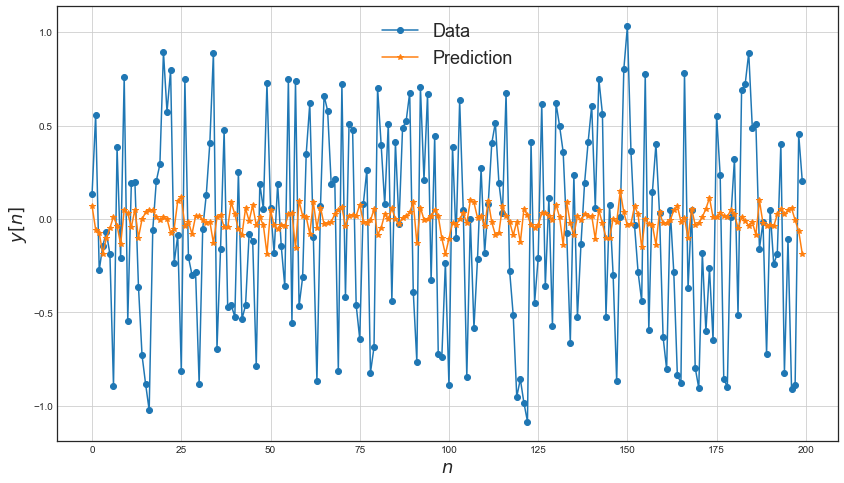

In [23]:
catboost.fit(x_train, y_train, verbose=False)

plot_results(y_valid, catboost.predict(x_valid))

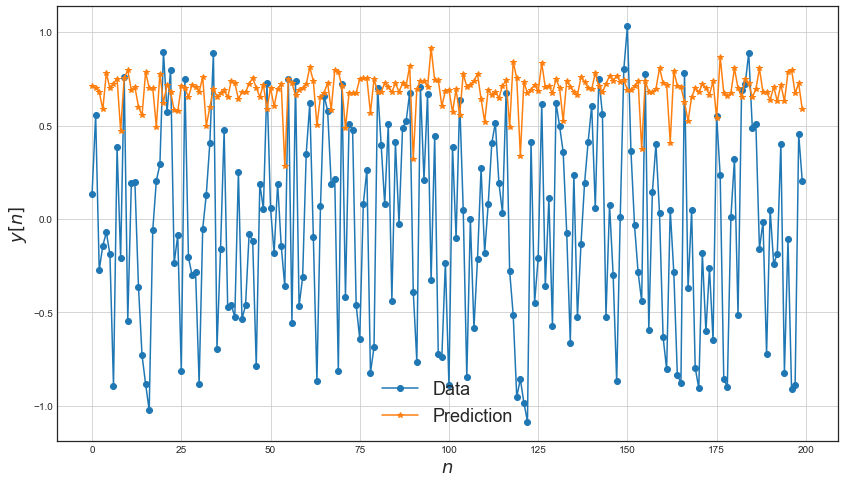

In [24]:
gb.fit(x_train, y_train)

plot_results(y_valid, gb.predict(x_valid))

# Introducing the NARX configuration using SysIdentPy

As you can see, you just need to pass the base estimator you want to the NARX class from SysIdentPy do build the NARX model! You can choose the lags of the input and output variables to build the regressor matrix.

 We keep the fit/predict method to make the process straightforward.

01-07 16:51:40 - INFO - Training the model
01-07 16:51:40 - INFO - Creating the regressor matrix
01-07 16:51:41 - INFO - The regressor matrix have 5 features
01-07 16:51:43 - INFO - Done! Model is built!
0.00015277808907582634


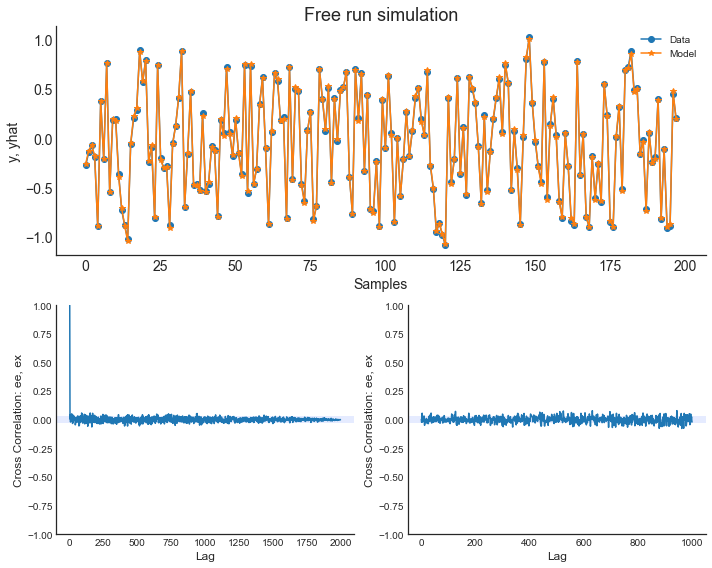

In [25]:
from sysidentpy.general_estimators import NARX

catboost_narx = NARX(base_estimator=CatBoostRegressor(iterations=300,
                                                      learning_rate=0.1,
                                                      depth=6),
                     xlag=2,
                     ylag=2,
                     fit_params={'verbose': False}
)

catboost_narx.fit(x_train, y_train)
yhat = catboost_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = catboost_narx.residuals(x_valid, y_valid, yhat)
catboost_narx.plot_result(y_valid, yhat, ee, ex, n=200)

01-07 17:03:20 - INFO - Training the model
01-07 17:03:20 - INFO - Creating the regressor matrix
01-07 17:03:20 - INFO - The regressor matrix have 5 features
01-07 17:03:33 - INFO - Done! Model is built!
0.0009623151220631377


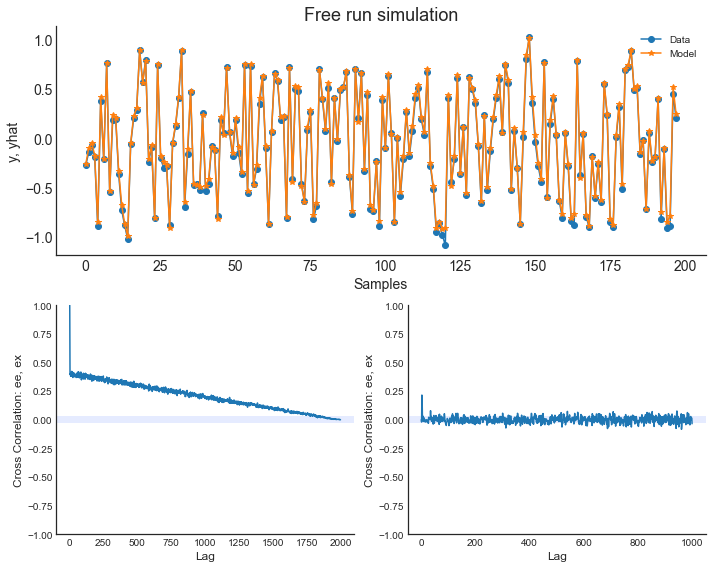

In [27]:
from sysidentpy.general_estimators import NARX

gb_narx = NARX(base_estimator=GradientBoostingRegressor(loss='quantile', alpha=0.90,
                                n_estimators=250, max_depth=10,
                                learning_rate=.1, min_samples_leaf=9,
                                min_samples_split=9),
              xlag=2,
              ylag=2
)

gb_narx.fit(x_train, y_train)
yhat = gb_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = gb_narx.residuals(x_valid, y_valid, yhat)
gb_narx.plot_result(y_valid, yhat, ee, ex, n=200)

01-07 17:03:48 - INFO - Training the model
01-07 17:03:48 - INFO - Creating the regressor matrix
01-07 17:03:48 - INFO - The regressor matrix have 5 features
01-07 17:03:48 - INFO - Done! Model is built!
0.0010634487808187914


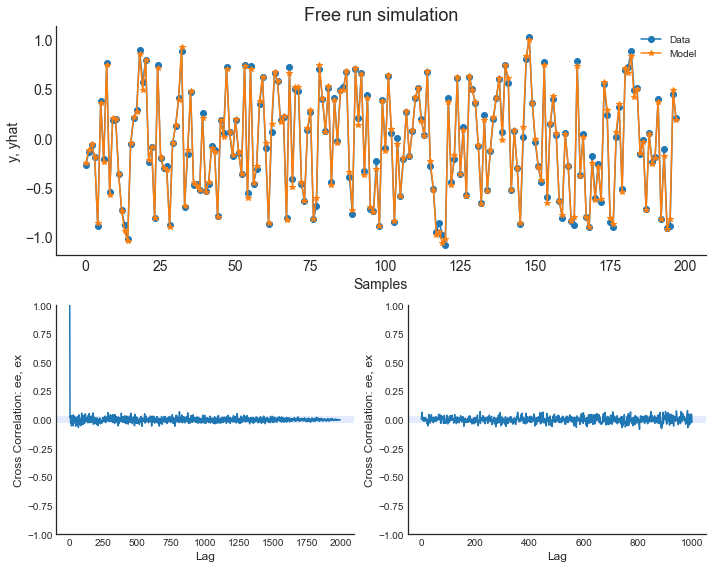

In [28]:
from sysidentpy.general_estimators import NARX

ARD_narx = NARX(base_estimator=ARDRegression(),
                xlag=2,
                ylag=2
)

ARD_narx.fit(x_train, y_train)
yhat = ARD_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = ARD_narx.residuals(x_valid, y_valid, yhat)
ARD_narx.plot_result(y_valid, yhat, ee, ex, n=200)

01-07 17:03:57 - INFO - Training the model
01-07 17:03:57 - INFO - Creating the regressor matrix
01-07 17:03:57 - INFO - The regressor matrix have 5 features
01-07 17:03:57 - INFO - Done! Model is built!
0.0010635104552663241


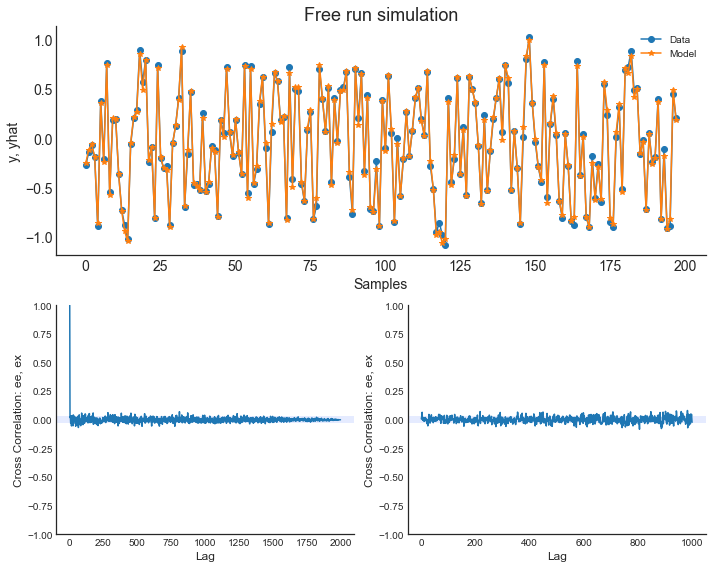

In [29]:
from sysidentpy.general_estimators import NARX

BayesianRidge_narx = NARX(base_estimator=BayesianRidge(),
                          xlag=2,
                          ylag=2
)

BayesianRidge_narx.fit(x_train, y_train)
yhat = BayesianRidge_narx.predict(x_valid, y_valid)
print(mean_squared_error(y_valid, yhat))

ee, ex, extras, lam = BayesianRidge_narx.residuals(x_valid, y_valid, yhat)
BayesianRidge_narx.plot_result(y_valid, yhat, ee, ex, n=200)